In [3]:
pip install --upgrade scikit-learn


In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics.pairwise import rbf_kernel

# Define the ECS kernel function
def ecs_kernel(x1, x2, sigma, alpha, beta):
    if beta is None:
        beta = np.ones(x1.shape[1])
    cubic_spline_part = 1 + alpha * np.sum(beta * x1**3, axis=1)[:, np.newaxis]
    return rbf_kernel(x1, x2, gamma=sigma) * cubic_spline_part

# Define the custom confusion matrix plot function
def plot_custom_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Define the decision boundary plot function
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()

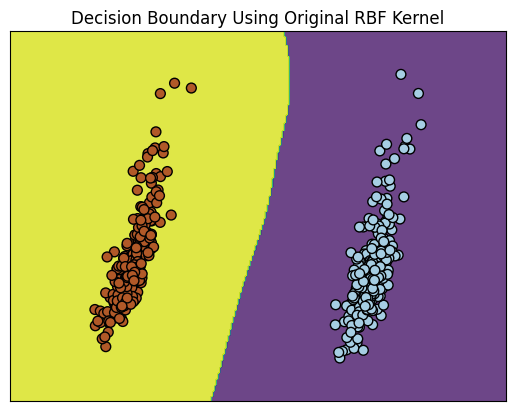

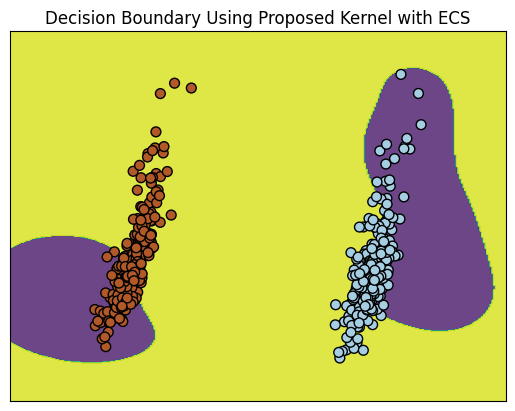

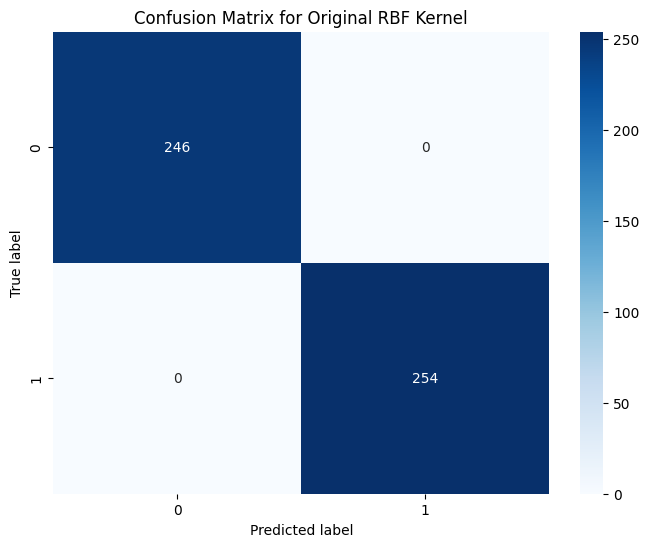

In [54]:
# Main code to run the entire process
if __name__ == '__main__':
    # Load synthetic data
    file_path = 'synthetic_data.csv'
    X, y = load_synthetic_data(file_path)  # You need to define this function

    # Standardize and apply PCA
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Train and visualize with original RBF kernel
    rbf_svc = SVC(kernel='rbf', C=1.0)
    rbf_svc.fit(X_pca, y)
    plot_decision_boundary(X_pca, y, rbf_svc, 'Decision Boundary Using Original RBF Kernel')

    # Train and visualize with proposed ECS kernel
    ecs_svc = SVC(kernel=lambda X1, X2: ecs_kernel(X1, X2, sigma=1.0, alpha=1.0, beta=np.array([1.0, 1.0])), C=1.0)
    ecs_svc.fit(X_pca, y)
    plot_decision_boundary(X_pca, y, ecs_svc, 'Decision Boundary Using Proposed Kernel with ECS')

    # Confusion matrices
    y_pred_rbf = rbf_svc.predict(X_pca)
    plot_custom_confusion_matrix(y, y_pred_rbf, 'Confusion Matrix for Original RBF Kernel')


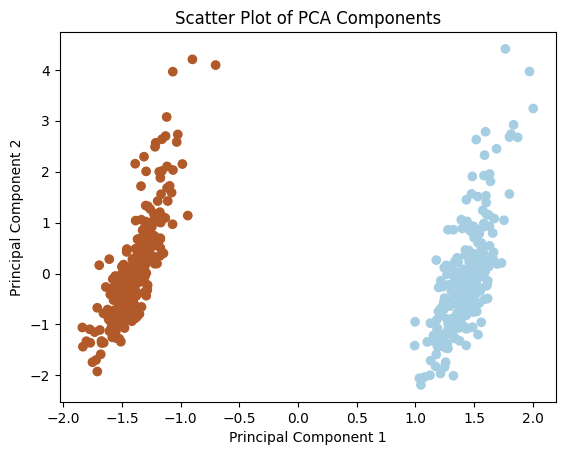

In [55]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Scatter Plot of PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


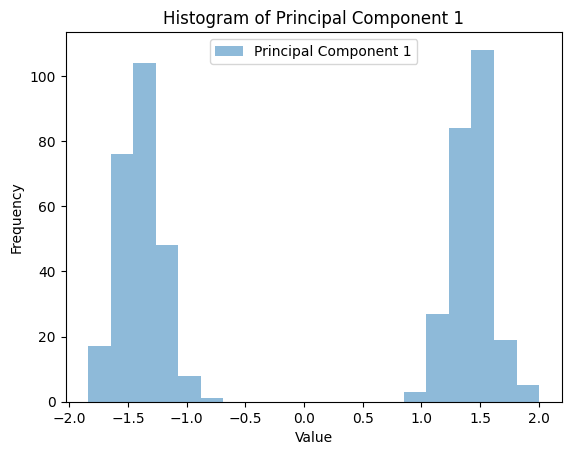

In [56]:
plt.hist(X_pca[:, 0], bins=20, alpha=0.5, label='Principal Component 1')
plt.title('Histogram of Principal Component 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


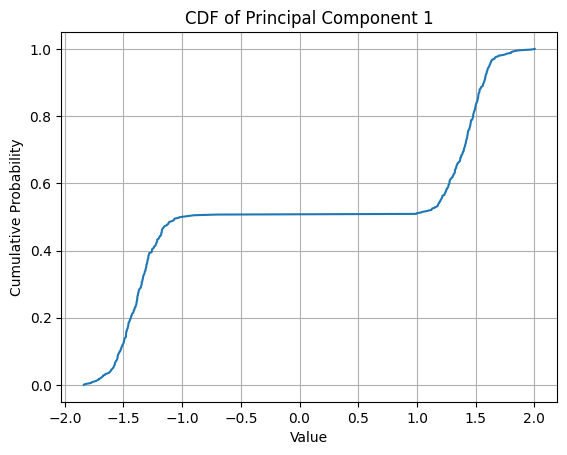

In [59]:
# Calculate the CDF
data_sorted = np.sort(X_pca[:, 0])
p = 1. * np.arange(len(data_sorted)) / (len(data_sorted) - 1)

# Plot the CDF
plt.plot(data_sorted, p)
plt.title('CDF of Principal Component 1')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.show()
